In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

In [24]:
df=pd.read_pickle("./dataset/Consolidate.pickle")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4343 entries, 10 to 5
Data columns (total 8 columns):
company        4335 non-null object
country        4343 non-null object
description    4343 non-null object
location       4343 non-null object
review         2040 non-null object
salary         4343 non-null object
star           2040 non-null object
title          4343 non-null object
dtypes: object(8)
memory usage: 305.4+ KB


In [25]:
#Have a look at the dataframe
df.tail()

,company,country,description,location,review,salary,star,title
6,2XM Finance,Australia,"Data cleansing, cleaning up the historical wor...",Perth WA,3,$40 - $45 an hour,60.0,Senior Accountant | Perth | $45p/h
2,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...",Mandurah WA,None,"$60,000 - $68,000 a year",None,ICT Business Analyst
5,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,Mandurah WA,None,"$60,000 - $70,000 a year",None,Developer Programmer
2,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...",Mandurah WA,None,"$60,000 - $68,000 a year",None,ICT Business Analyst
5,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,Mandurah WA,None,"$60,000 - $70,000 a year",None,Developer Programmer


### Cleaning of data

In [26]:
#Checking shape of dataframe
print "Shape of dataset before removing duplicate : " + str(df.shape)

#Removing any duplicate rows if any and reset the index
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print "Shape of dataset after removing duplicate : " + str(df.shape)

Shape of dataset before removing duplicate : (4343, 8)
Shape of dataset after removing duplicate : (4343, 8)


### Cleaning of Salary

In [27]:
def salarytransformer(element):
    """ transform salary to the mean value of the range."""
    listofvalues = element.replace(',','').split(' ')
    newlister = []
    for s in listofvalues:
        s = s[1:]
       
        if "$" in s:
            s = s.strip("$")
            s = float(s)
            newlister.append(s)
            continue
        
        if s.isdigit():
            s = float(s)
            newlister.append(s)
            
    array = np.array(newlister)
    
    if listofvalues[-1] in "month":
        array*=12    # excludes bonus
    if listofvalues[-1] in "week":
        array*=52   #52 weeks
    if listofvalues[-1] in "day":
        array*=230   #5/7*365-30
    if listofvalues[-1] in "hour":
        array*=1840  #day*8
    
    if len(array) == 2:
        
        array = np.mean(array)
        return array
    
    elif len(array) == 1:
        return array[0]

    else:
        return None

In [28]:
df['sal_period'] = np.nan
#Save time period of salary into a new column

#period string in the og_salary_period column
df.loc[df['salary'].str.contains('year'), 'sal_period'] = 'year'
df.loc[df['salary'].str.contains('month'), 'sal_period'] = 'month'
df.loc[df['salary'].str.contains('week'), 'sal_period'] = 'week'
df.loc[df['salary'].str.contains('day'), 'sal_period'] = 'day'
df.loc[df['salary'].str.contains('hour'), 'sal_period'] = 'hour'

df.tail()

,company,country,description,location,review,salary,star,title,sal_period
4338,2XM Finance,Australia,"Data cleansing, cleaning up the historical wor...",Perth WA,3,$40 - $45 an hour,60.0,Senior Accountant | Perth | $45p/h,hour
4339,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...",Mandurah WA,None,"$60,000 - $68,000 a year",None,ICT Business Analyst,year
4340,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,Mandurah WA,None,"$60,000 - $70,000 a year",None,Developer Programmer,year
4341,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...",Mandurah WA,None,"$60,000 - $68,000 a year",None,ICT Business Analyst,year
4342,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,Mandurah WA,None,"$60,000 - $70,000 a year",None,Developer Programmer,year


In [29]:
df['Sal_clean'] =  df['salary'].map(salarytransformer)
print 'There are '+ str(df['Sal_clean'].isnull().sum()) + ' rows with Null values'

#I cant seem to be able to clean this up
df.loc[df['Sal_clean'].isnull()].head()

There are 142 rows with Null values


,company,country,description,location,review,salary,star,title,sal_period,Sal_clean
136,Echo Plan,United Kingdom,Data Analyst (Planning) / Sunderland / £12.74p...,Tyne and Wear,None,£12.74 an hour,None,Data Analyst (Planning),hour,NaN
145,Morson International,United Kingdom,"Business Intelligence Analyst, SC Clearance, S...",Barrow-In-Furness,46,£40.00 - £46.21 an hour,43.8,"Business Intelligence, BI Engineer, BI Analyst",hour,NaN
163,Rullion,United Kingdom,"Strong analytical skills, able to draw appropr...",North West,3,£16.71 - £20.56 an hour,60.0,Business Analyst - Environmental,hour,NaN
367,Daisy Recruitment Ltd,United Kingdom,They are currently looking to appoint a Data A...,Knaresborough,None,£8.00 - £8.50 an hour,None,Data Analyst Adminstration,hour,NaN
386,Quality Personnel Ltd,United Kingdom,Ability to analyse data using standard statist...,Kingston upon Hull,None,£15.60 an hour,None,Procurement Analyst,hour,NaN


In [30]:
df.drop(['location', 'review', 'star'], axis=1, inplace=True)

In [31]:
#drop these null rows them for now and check
df.dropna(inplace=True)
print df['Sal_clean'].isnull().sum()

#double check for Null Value
df.isnull().sum()

0


company        0
country        0
description    0
salary         0
title          0
sal_period     0
Sal_clean      0
dtype: int64

In [32]:
df.reset_index(drop=True, inplace=True)
print df.shape
df.tail()

(4193, 7)


,company,country,description,salary,title,sal_period,Sal_clean
4188,2XM Finance,Australia,"Data cleansing, cleaning up the historical wor...",$40 - $45 an hour,Senior Accountant | Perth | $45p/h,hour,78200.0
4189,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...","$60,000 - $68,000 a year",ICT Business Analyst,year,64000.0
4190,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,"$60,000 - $70,000 a year",Developer Programmer,year,65000.0
4191,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...","$60,000 - $68,000 a year",ICT Business Analyst,year,64000.0
4192,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,"$60,000 - $70,000 a year",Developer Programmer,year,65000.0


In [33]:
df['Sal_clean'].value_counts()

40000.0     151
30000.0     131
35000.0     120
45000.0     108
50000.0      98
27500.0      73
25000.0      72
37500.0      70
70000.0      59
55000.0      57
60000.0      55
32500.0      55
42500.0      53
90000.0      53
75000.0      48
80000.0      47
85000.0      46
100000.0     46
65000.0      44
52500.0      39
24000.0      37
22000.0      35
20000.0      35
115000.0     33
47500.0      33
23000.0      31
29000.0      31
22500.0      30
57500.0      29
92000.0      29
           ... 
39702.5       1
32450.0       1
59894.0       1
57546.0       1
50676.0       1
71712.0       1
38694.0       1
55216.0       1
132250.0      1
27027.5       1
117000.0      1
25498.0       1
44220.0       1
50150.0       1
89700.0       1
64817.5       1
67170.0       1
88320.0       1
113022.0      1
31480.0       1
38702.0       1
26495.0       1
25750.0       1
31381.5       1
42282.5       1
98900.0       1
24964.0       1
62400.0       1
34600.0       1
53904.0       1
Name: Sal_clean, Length:

In [34]:
df['country'].value_counts()

United Kingdom    2813
United States      762
Australia          383
Canada             174
Singapore           44
Malaysia            17
Name: country, dtype: int64

In [35]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()

In [36]:
df['Sal_clean'].dtypes

dtype('float64')

In [15]:
"""UK_USD = 1.31
Aust_USD = 0.76
Can_USD = 0.78
Sg_USD = 0.73
Msia_USD = 0.24

for i in range(len(df['Sal_clean'])):
    if df['country'][i]== 'United Kingdom':
               df['Sal_clean'][i] = df['Sal_clean'][i] *UK_USD
    if df['country'][i]== 'United States':
               df['Sal_clean'][i] = df['Sal_clean'][i] *1
    if df['country'][i]== 'Australia':
               df['Sal_clean'][i] = df['Sal_clean'][i] *Aust_USD
    if df['country'][i]== 'Canada':
               df['Sal_clean'][i] = df['Sal_clean'][i] *Can_USD
    if df['country'][i]== 'Singapore':
               df['Sal_clean'][i] = df['Sal_clean'][i] *Sg_USD
    else:
               df['Sal_clean'][i] = df['Sal_clean'][i] *Msia_USD"""


"UK_USD = 1.31\nAust_USD = 0.76\nCan_USD = 0.78\nSg_USD = 0.73\nMsia_USD = 0.24\n\nfor i in range(len(df['Sal_clean'])):\n    if df['country'][i]== 'United Kingdom':\n               df['Sal_clean'][i] = df['Sal_clean'][i] *UK_USD\n    if df['country'][i]== 'United States':\n               df['Sal_clean'][i] = df['Sal_clean'][i] *1\n    if df['country'][i]== 'Australia':\n               df['Sal_clean'][i] = df['Sal_clean'][i] *Aust_USD\n    if df['country'][i]== 'Canada':\n               df['Sal_clean'][i] = df['Sal_clean'][i] *Can_USD\n    if df['country'][i]== 'Singapore':\n               df['Sal_clean'][i] = df['Sal_clean'][i] *Sg_USD\n    else:\n               df['Sal_clean'][i] = df['Sal_clean'][i] *Msia_USD"

In [37]:
df.columns

Index([u'company', u'country', u'description', u'salary', u'title',
       u'sal_period', u'Sal_clean'],
      dtype='object')

In [39]:
#what is the median salary? (calculate mean salary, too, for fun)
print("salary median: " + str(df["Sal_clean"].median()))
print("salary mean: " + str(df["Sal_clean"].mean()))

#creating new target variable "above_med_sal" 
df["above_med_sal"] = np.nan

#where 0 == below or equal to the median, and 1 == above the median; 
df.loc[df["Sal_clean"] > df["Sal_clean"].median(), "above_med_sal"] = 1
df.loc[df["Sal_clean"] <= df["Sal_clean"].median(), "above_med_sal"] = 0
df.tail()

salary median: 44500.0
salary mean: 55361.0227761


,company,country,description,salary,title,sal_period,Sal_clean,above_med_sal
4188,2XM Finance,Australia,"Data cleansing, cleaning up the historical wor...",$40 - $45 an hour,Senior Accountant | Perth | $45p/h,hour,78200.0,1.0
4189,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...","$60,000 - $68,000 a year",ICT Business Analyst,year,64000.0,1.0
4190,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,"$60,000 - $70,000 a year",Developer Programmer,year,65000.0,1.0
4191,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...","$60,000 - $68,000 a year",ICT Business Analyst,year,64000.0,1.0
4192,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,"$60,000 - $70,000 a year",Developer Programmer,year,65000.0,1.0


In [40]:
df['above_med_sal'].value_counts()
print df['above_med_sal'].isnull().sum()

0


In [41]:
base = 2093.0/(2093.0+2100)
base

0.4991652754590985

In [42]:
print df['description'][1]
df['description'].head()

Data Scientist Duties:. We are looking for a Data Scientist to help us analyse vast amounts of data and help us make smarter decisions to deliver better...


0    Use all available data, undertaking data disco...
1    Data Scientist Duties:. We are looking for a D...
2    Using data modeling, linear regression, statis...
3    Assist the Data Scientist in deploying Machine...
4    Data Scientist - Summary*. Bachelor in degree ...
Name: description, dtype: object

In [43]:
#targeted replace of “r&d” in job titles and summaries with #“research development” to remove “&” 
df['title'] = df['title'].str.replace('R&D', 'research development')
df['description'] = df['description'].str.replace('R&D', 'research development')

In [48]:
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

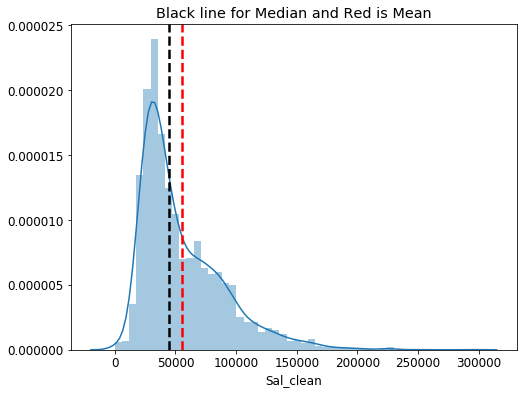

In [51]:
#plotting salary distribution, with vertical lines to represent the mean and median salary
sal_plot = df[df["Sal_clean"].notnull()]
ax = sns.distplot(sal_plot["Sal_clean"])
ax.axvline(sal_plot["Sal_clean"].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(sal_plot["Sal_clean"].mean(), lw=2.5, ls='dashed', color='red')
ax.set_title('Black line for Median and Red is Mean')

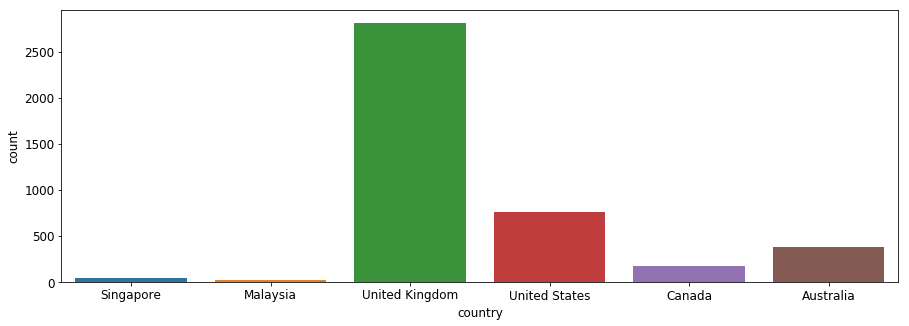

In [63]:
fig = plt.subplots(figsize=(15,5))
sns.countplot(x="country",data=df)

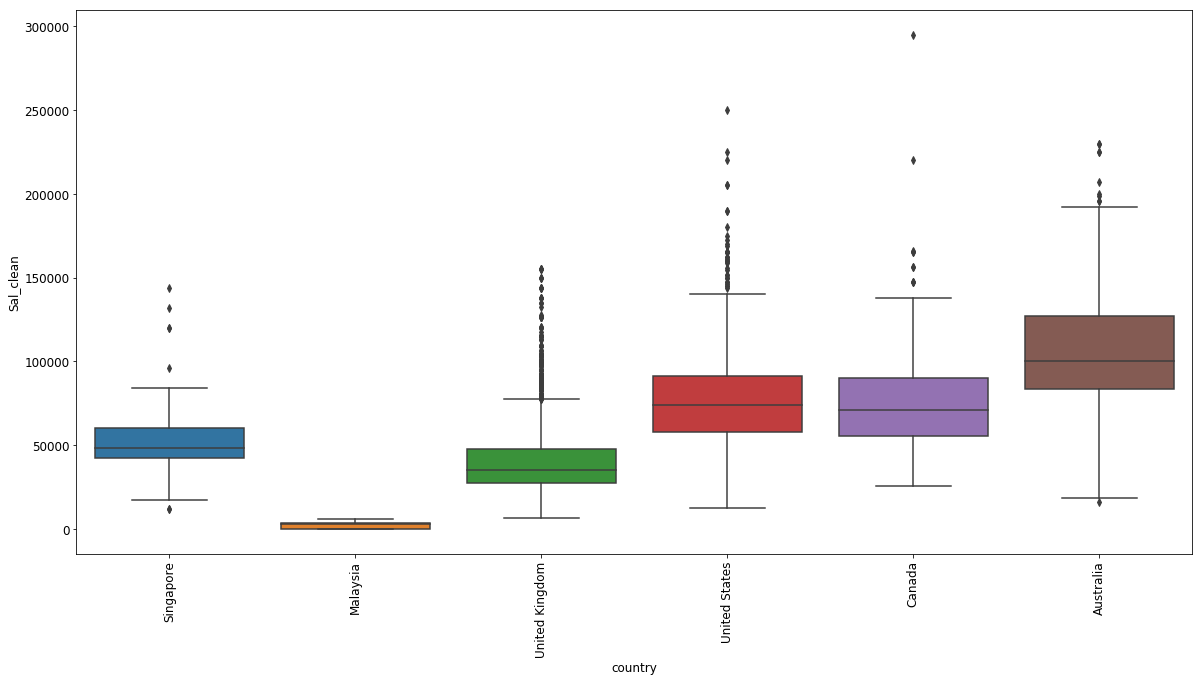

In [96]:
# Salary distribution at different city

plt.subplots(figsize = (20,10))
sns.boxplot(x =df["country"], y=df["Sal_clean"], data = df)#.set_xticklabels(70)
plt.xticks(rotation = 90)
plt.show()

In [56]:
#We'll only be training our model on jobs that have salary data, so separate out salary jobs

#splitting out our predictor variables from the salary data
sal_X = df.iloc[:,0:len(df.columns)-1]

#sal_y will be above_med_sal, creating as a dataframe
sal_y = pd.DataFrame(df["above_med_sal"])

In [60]:
sal_X.shape

(4193, 7)

In [138]:
sal_X.drop('salary',axis=1, inplace = True)

In [58]:
sal_y.shape

(4193, 1)

In [139]:
df['title'].value_counts()

data analyst                                                                        153
data scientist                                                                      124
business analyst                                                                     86
senior data scientist                                                                25
financial analyst                                                                    21
finance analyst                                                                      20
reporting analyst                                                                    19
analyst                                                                              19
insight analyst                                                                      18
data engineer                                                                        18
business intelligence analyst                                                        16
pricing analyst                 

In [140]:
df["title"] = df.title.str.lower()

In [141]:
df['title'].head

<bound method Series.head of 0                                          data scientist
1                                          data scientist
2                                          data scientist
3                                           data engineer
4                                          data scientist
5                                   data scientist intern
6                           data crawling engineer intern
7              robot software engineer - image processing
8                 data visualization and wrangling intern
9                                            data analyst
10                            data analyst (1.6/mth) - xy
11                      research analyst (data analytics)
12                              financial markets analyst
13                           research analyst (full-time)
14                     data center infrastructure analyst
15                                       business analyst
16                               junior fin

In [142]:
#using train test split with 70-30 split and to keep the ratio of 'above_med_sal',  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.3, stratify=sal_y, random_state=77)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [143]:
X_train.shape

(2935, 6)

In [144]:
#Using count vectorizer to examine text-based data for logistic regression. Look at 1 word to 3 words
#only taking interest on words that is in more than 20% in postings
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english',ngram_range=(1, 3), min_df = .05)

In [145]:
cvec

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.05,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [146]:
from unidecode import unidecode
for i in range(len(df)):
    df.loc[i, 'title'] = unidecode(df['title'][i])

In [147]:
#Fit the Cvec with X train on Job title
cvec.fit(X_train["title"])

#transforming 'description' data into job_train
job_train = pd.DataFrame(cvec.transform(X_train["title"]).todense(),
                       columns=cvec.get_feature_names())

In [148]:
word_observe = pd.concat([job_train, y_train], axis=1)
word_observe.tail()

,analyst,business,business analyst,data,data analyst,data scientist,research,scientist,senior,above_med_sal
2930,0,0,0,0,0,0,0,0,1,1.0
2931,0,0,0,1,0,1,0,1,0,1.0
2932,1,0,0,0,0,0,0,0,0,0.0
2933,1,0,0,1,1,0,0,0,0,1.0
2934,1,0,0,0,0,0,0,0,0,0.0


In [149]:
#Observing most common job title n-grams for both above and below median salaries
for i in xrange(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print i, "most common words"
    cw = word_count.sort_values(ascending = False).head(20)
    print cw
    print

0 most common words
analyst             1001.0
data                 357.0
data analyst         243.0
scientist            126.0
business             124.0
senior                96.0
research              89.0
business analyst      77.0
data scientist        45.0
above_med_sal          0.0
dtype: float64

1 most common words
above_med_sal       1465.0
analyst              780.0
data                 496.0
scientist            312.0
data scientist       238.0
senior               205.0
business             167.0
business analyst     121.0
data analyst         117.0
research              93.0
dtype: float64



In [152]:
X_train.head()

,company,country,description,title,sal_period,Sal_clean
0,Codex Recruitment Limited,United Kingdom,Data Scientist Opening - London. As Lead Data ...,Data Scientist - London - £40-60k,year,50000.0
1,CK Group,United Kingdom,Stephanie Maccioni is currently recruiting for...,Senior Statistician,day,13800.0
2,Smarkets,United Kingdom,Solid knowledge of data structures and algorit...,"Software Engineer, London, UK",year,72500.0
3,University of Bristol,United Kingdom,The scientists trained in this programme will ...,Post-Doctoral Research Associate in Applied Ma...,year,34580.5
4,Emory University,United States,Various personal computer software application...,Prospect Research Analyst-Development and Alum...,year,53200.0


In [150]:
#now score a logistic regression on X_train and y_train using cross_val_scores

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print "Score:", logreg.score(X_train, y_train)     
scores = cross_val_score(logreg, X_train, y_train, cv=6)
print "Cross-validated scores:", scores

ValueError: could not convert string to float: year